In [1]:
import pandas as pd
import numpy as np

df = pd.read_table('~/Downloads/INFO_4604/AwarenessVsInfection_month.tsv')

In [2]:
df.head()

,Twitter_Id,Twitter_content,Time,intent
0,4063561008,you gotta be kidding me .. everyone around me ...,9,0
1,4063912301,getting my flu shot then babysitting .,9,1
2,4064279613,my arm is getting sore from that damn flu shot...,9,1
3,4066630902,seems like these bird profile pics are spreadi...,9,1
4,4066949107,i think i'm in the process of getting the flu ...,9,0


In [3]:
new_df = df.loc[:,['Twitter_content','intent']]

In [4]:
new_df.head()

,Twitter_content,intent
0,you gotta be kidding me .. everyone around me ...,0
1,getting my flu shot then babysitting .,1
2,my arm is getting sore from that damn flu shot...,1
3,seems like these bird profile pics are spreadi...,1
4,i think i'm in the process of getting the flu ...,0


In [5]:
df2 = new_df.rename(index=str, columns={"Twitter_content": "Text", "intent": "Illness"})

In [6]:
df2.head()

,Text,Illness
0,you gotta be kidding me .. everyone around me ...,0
1,getting my flu shot then babysitting .,1
2,my arm is getting sore from that damn flu shot...,1
3,seems like these bird profile pics are spreadi...,1
4,i think i'm in the process of getting the flu ...,0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

text_train, text_test, Y_train, Y_test = train_test_split(df2['Text'], df2['Illness'], test_size=0.4, random_state=0)

In [8]:
import re
from collections import Counter

def ngrams(tokens, n):
    output = []
    for i in range(n-1, len(tokens)):
        ngram = ' '.join(tokens[i-n+1:i+1])
        output.append(ngram)
    return output

def features(text, ngram_range=(1,1)):
    text = text.lower()      # make the string lowercase
    text = re.sub(r'(.)\1+', r'\1\1', text)     # remove consecutive characters that are repeated more than twice
    
    features_in_text = []   # running list of all features in this instance (can be repeated)
    
    # treat alphanumeric characters as word tokens (removing anything else),
    # and extract all n-grams of length n specified by ngram_range
    
    text_alphanum = re.sub('[^a-z0-9]', ' ', text)
    for n in range(ngram_range[0], ngram_range[1]+1):
        features_in_text += ngrams(text_alphanum.split(), n)
    
    # now treat punctuation as word tokens, and get their counts (only unigrams)
    
    text_punc = re.sub('[a-z0-9]', ' ', text)
    features_in_text += ngrams(text_punc.split(), 1)
    
    # 'Counter' converts a list into a dictionary whose keys are the list elements 
    #  and the values are the number of times each element appeared in the list
    
    return Counter(features_in_text)


In [9]:
from sklearn.feature_extraction import DictVectorizer

vect = DictVectorizer()
X_train = vect.fit_transform(features(d, ngram_range=(1,3)) for d in text_train)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score

# this defines the classifier we will use -- don't change this variable

base_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=123)

# these are the C values we will compare -- don't change this variable

params = [{'C': [0.01, 0.1, 0.5, 1.0, 2.5, 5.0, 10.0, 50.0, 100.0]}]

# this performs 5-fold cross-validation with the above classifier and parameter options

gs_classifier = GridSearchCV(base_classifier, params, cv=5)
gs_classifier.fit(X_train, Y_train)

print("Best parameter settings:", gs_classifier.best_params_)
print("Validation accuracy: %0.6f" % gs_classifier.best_score_)

Best parameter settings: {'C': 0.5}
Validation accuracy: 0.803517


In [11]:
X_train = vect.fit_transform(features(d, ngram_range=(1,1)) for d in text_train)
gs_classifier = GridSearchCV(base_classifier, params, cv=5)
gs_classifier.fit(X_train, Y_train)
print("Validation accuracy: %0.6f" % gs_classifier.best_score_)

X_train = vect.fit_transform(features(d, ngram_range=(2,2)) for d in text_train)
gs_classifier = GridSearchCV(base_classifier, params, cv=5)
gs_classifier.fit(X_train, Y_train)
print("Validation accuracy: %0.6f" % gs_classifier.best_score_)

X_train = vect.fit_transform(features(d, ngram_range=(3,3)) for d in text_train)
gs_classifier = GridSearchCV(base_classifier, params, cv=5)
gs_classifier.fit(X_train, Y_train)
print("Validation accuracy: %0.6f" % gs_classifier.best_score_)

X_train = vect.fit_transform(features(d, ngram_range=(1,2)) for d in text_train)
gs_classifier = GridSearchCV(base_classifier, params, cv=5)
gs_classifier.fit(X_train, Y_train)
print("Validation accuracy: %0.6f" % gs_classifier.best_score_)

X_train = vect.fit_transform(features(d, ngram_range=(1,3)) for d in text_train)
gs_classifier = GridSearchCV(base_classifier, params, cv=5)
gs_classifier.fit(X_train, Y_train)
print("Validation accuracy: %0.6f" % gs_classifier.best_score_)

X_train = vect.fit_transform(features(d, ngram_range=(2,3)) for d in text_train)
gs_classifier = GridSearchCV(base_classifier, params, cv=5)
gs_classifier.fit(X_train, Y_train)
print("Validation accuracy: %0.6f" % gs_classifier.best_score_)

Validation accuracy: 0.803517
Validation accuracy: 0.786697
Validation accuracy: 0.736239
Validation accuracy: 0.804281
Validation accuracy: 0.808104
Validation accuracy: 0.785168


In [12]:
X_train = vect.fit_transform(features(d, ngram_range=(1,3)) for d in text_train)
X_test = vect.fit_transform(features(d, ngram_range=(1,3)) for d in text_test)
gs_classifier = GridSearchCV(base_classifier, params, cv=5)
gs_classifier.fit(X_train, Y_train)
print("Validation accuracy: %0.6f" % gs_classifier.best_score_)

scores = cross_val_score(gs_classifier, X_train, Y_train, cv=5)
scores  

Validation accuracy: 0.808104


array([0.76425856, 0.82442748, 0.81609195, 0.81226054, 0.81226054])



Percentile vs. Accuracy for Ngram Range (1,3)


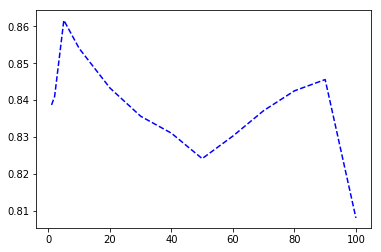

In [13]:
from sklearn.feature_selection import SelectPercentile, chi2
import matplotlib.pyplot as plt

percentiles = [1,2,5,10,20,30,40,50,60,70,80,90,100]
accuracies = []

for p in range(len(percentiles)):
    selection = SelectPercentile(percentile=percentiles[p], score_func=chi2)
    X_train_selected = selection.fit_transform(X_train, Y_train)
    gs_classifier.fit(X_train_selected, Y_train)
    accuracies.append(gs_classifier.best_score_)

print("\n\nPercentile vs. Accuracy for Ngram Range (1,3)")
plt.plot(percentiles, accuracies, 'b--')
plt.show()

In [14]:
X_train_final = vect.fit_transform(features(d, ngram_range=(1,3)) for d in text_train)
X_test_final = vect.transform(features(d, ngram_range=(1,3)) for d in text_test)

selection = SelectPercentile(percentile=85, score_func=chi2)
X_train_final = selection.fit_transform(X_train_final, Y_train)
X_test_final = selection.transform(X_test_final)

gs_classifier = GridSearchCV(base_classifier, params, cv=5)
gs_classifier.fit(X_train_final, Y_train)

print("Validation accuracy: %0.6f" % gs_classifier.best_score_)
print("Test accuracy: %0.6f" % accuracy_score(Y_test, gs_classifier.predict(X_test_final)))

scores = cross_val_score(gs_classifier, X_train, Y_train, cv=5)
scores 

Validation accuracy: 0.844801
Test accuracy: 0.813073


array([0.76425856, 0.82442748, 0.81609195, 0.81226054, 0.81226054])

In [15]:
def skipgrams(tokens, n):
    output = []
    for i in range(n-1, len(tokens)):
        str1 = ''
        for j in range(n-2):
            str1 = str1+' * '
        skipgram = str(tokens[i-n+1])+str1+str(tokens[i])
        output.append(skipgram)
    return output


def skipgramfeatures(text, ngram_range=(3,4)):
    text = text.lower()      # make the string lowercase
    text = re.sub(r'(.)\1+', r'\1\1', text)     # remove consecutive characters that are repeated more than twice
    
    features_in_text = []   # running list of all features in this instance (can be repeated)
    
    # treat alphanumeric characters as word tokens (removing anything else),
    # and extract all n-grams of length n specified by ngram_range
    
    text_alphanum = re.sub('[^a-z0-9]', ' ', text)
    for n in range(ngram_range[0], ngram_range[1]+1):
        features_in_text += skipgrams(text_alphanum.split(), n)
    
    
    # 'Counter' converts a list into a dictionary whose keys are the list elements 
    #  and the values are the number of times each element appeared in the list
    
    return Counter(features_in_text)

In [16]:
sample = ['the','water','is','very','cold']

skipgrams(sample,3)

['the * is', 'water * very', 'is * cold']

In [17]:
X_train_final = vect.fit_transform(skipgramfeatures(d) for d in text_train)
X_test_final = vect.transform(skipgramfeatures(d) for d in text_test)

selection = SelectPercentile(percentile=85, score_func=chi2)
X_train_final = selection.fit_transform(X_train_final, Y_train)
X_test_final = selection.transform(X_test_final)

gs_classifier = GridSearchCV(base_classifier, params, cv=5)
gs_classifier.fit(X_train_final, Y_train)

print("Validation accuracy: %0.6f" % gs_classifier.best_score_)
print("Test accuracy: %0.6f" % accuracy_score(Y_test, gs_classifier.predict(X_test_final)))

scores = cross_val_score(gs_classifier, X_train, Y_train, cv=5)
scores 

Validation accuracy: 0.829511
Test accuracy: 0.748853


array([0.76425856, 0.82442748, 0.81609195, 0.81226054, 0.81226054])

In [18]:
X_train_final = vect.fit_transform(features(d, ngram_range=(1,3)) for d in text_train)
X_test_final = vect.transform(features(d, ngram_range=(1,3)) for d in text_test)

selection = SelectPercentile(percentile=85, score_func=chi2)
X_train_final = selection.fit_transform(X_train_final, Y_train)
X_test_final = selection.transform(X_test_final)

gs_classifier = GridSearchCV(base_classifier, params, cv=5)
gs_classifier.fit(X_train_final, Y_train)

print("Validation accuracy: %0.6f" % gs_classifier.best_score_)
print("Test accuracy: %0.6f" % accuracy_score(Y_test, gs_classifier.predict(X_test_final)))

scores = cross_val_score(gs_classifier, X_train, Y_train, cv=5)
scores 

Validation accuracy: 0.844801
Test accuracy: 0.813073


array([0.76425856, 0.82442748, 0.81609195, 0.81226054, 0.81226054])

In [19]:
def features(text, ngram_range=(1,3)):
    text = text.lower()      # make the string lowercase
    text = re.sub(r'(.)\1+', r'\1\1', text)     # remove consecutive characters that are repeated more than twice
    
    features_in_text = []   # running list of all features in this instance (can be repeated)
    
    # treat alphanumeric characters as word tokens (removing anything else),
    # and extract all n-grams of length n specified by ngram_range
    
    text_alphanum = re.sub('[^a-z0-9]', ' ', text)
    for n in range(ngram_range[0], ngram_range[1]+1):
        features_in_text += ngrams(text_alphanum.split(), n)
    
    for n in range(3,5):
        features_in_text += skipgrams(text_alphanum.split(), n)
        
    
    # now treat punctuation as word tokens, and get their counts (only unigrams)
    
    text_punc = re.sub('[a-z0-9]', ' ', text)
    features_in_text += ngrams(text_punc.split(), 1)
    
    
    # 'Counter' converts a list into a dictionary whose keys are the list elements 
    #  and the values are the number of times each element appeared in the list
    
    return Counter(features_in_text)



In [20]:
X_train_final = vect.fit_transform(features(d, ngram_range=(1,3)) for d in text_train)
X_test_final = vect.transform(features(d, ngram_range=(1,3)) for d in text_test)

selection = SelectPercentile(percentile=85, score_func=chi2)
X_train_final = selection.fit_transform(X_train_final, Y_train)
X_test_final = selection.transform(X_test_final)

gs_classifier = GridSearchCV(base_classifier, params, cv=5)
gs_classifier.fit(X_train_final, Y_train)

print("Validation accuracy: %0.6f" % gs_classifier.best_score_)
print("Test accuracy: %0.6f" % accuracy_score(Y_test, gs_classifier.predict(X_test_final)))

scores = cross_val_score(gs_classifier, X_train, Y_train, cv=5)
scores 

Validation accuracy: 0.853211
Test accuracy: 0.815367


array([0.76425856, 0.82442748, 0.81609195, 0.81226054, 0.81226054])

There is a very slight improvement with skipgrams here it appears though hard to say exactly.

In [21]:
sentiment_df = pd.read_csv('http://cmci.colorado.edu/classes/INFO-4604/data/sentiment-words.csv', header=None,encoding = "ISO-8859-1")

# The two variables, positive_words and negative_words, are sets that contain the positive/negative words

positive_words = sentiment_df.loc[sentiment_df[0] == 'positive']
positive_words = set(positive_words.iloc[0:, 1].values)

negative_words = sentiment_df.loc[sentiment_df[0] == 'negative']
negative_words = set(negative_words.iloc[0:, 1].values)

In [22]:
def sentiment(ngrams):
    output = []
    for ngram in ngrams:
        for word in ngram.split():
            s = re.compile(word)
            if word in positive_words:
                replace = s.sub('POS',ngram)
                output.append(replace)
            if word in negative_words:
                replace = s.sub('NEG',ngram)
                output.append(replace)
            
    return output

In [23]:
sample = ['the','water','is','very','cold']

skipgrams(sample,3)

['the * is', 'water * very', 'is * cold']

In [24]:
l = ngrams(sample,3)
l

['the water is', 'water is very', 'is very cold']

In [25]:
sentiment(l)

['is very NEG']

In [26]:
def features(text, ngram_range=(1,3)):
    text = text.lower()      # make the string lowercase
    text = re.sub(r'(.)\1+', r'\1\1', text)     # remove consecutive characters that are repeated more than twice
    
    features_in_text = []   # running list of all features in this instance (can be repeated)
    
    # treat alphanumeric characters as word tokens (removing anything else),
    # and extract all n-grams of length n specified by ngram_range
    
    text_alphanum = re.sub('[^a-z0-9]', ' ', text)
    for n in range(ngram_range[0], ngram_range[1]+1):
        features_in_text += ngrams(text_alphanum.split(), n)
        features_in_text += sentiment(ngrams(text_alphanum.split(), n))
    
    for n in range(3,5):
        features_in_text += skipgrams(text_alphanum.split(), n)
        
    # now treat punctuation as word tokens, and get their counts (only unigrams)
    
    text_punc = re.sub('[a-z0-9]', ' ', text)
    features_in_text += ngrams(text_punc.split(), 1)
    
    
    # 'Counter' converts a list into a dictionary whose keys are the list elements 
    #  and the values are the number of times each element appeared in the list
    
    return Counter(features_in_text)



In [27]:
X_train_final = vect.fit_transform(features(d, ngram_range=(1,3)) for d in text_train)
X_test_final = vect.transform(features(d, ngram_range=(1,3)) for d in text_test)

selection = SelectPercentile(percentile=85, score_func=chi2)
X_train_final = selection.fit_transform(X_train_final, Y_train)
X_test_final = selection.transform(X_test_final)

gs_classifier = GridSearchCV(base_classifier, params, cv=5)
gs_classifier.fit(X_train_final, Y_train)

print("Validation accuracy: %0.6f" % gs_classifier.best_score_)
print("Test accuracy: %0.6f" % accuracy_score(Y_test, gs_classifier.predict(X_test_final)))

scores = cross_val_score(gs_classifier, X_train, Y_train, cv=5)
scores  

Validation accuracy: 0.850917
Test accuracy: 0.814220


array([0.76425856, 0.82442748, 0.81609195, 0.81226054, 0.81226054])

In [28]:
import itertools

def pairs(words):
    ret = itertools.combinations(words,2)
    return ret
        

In [29]:
for pair in pairs(sample):
    print(pair)

('the', 'water')
('the', 'is')
('the', 'very')
('the', 'cold')
('water', 'is')
('water', 'very')
('water', 'cold')
('is', 'very')
('is', 'cold')
('very', 'cold')


In [30]:
def features(text, ngram_range=(1,3)):
    text = text.lower()      # make the string lowercase
    text = re.sub(r'(.)\1+', r'\1\1', text)     # remove consecutive characters that are repeated more than twice
    
    features_in_text = []   # running list of all features in this instance (can be repeated)
    
    # treat alphanumeric characters as word tokens (removing anything else),
    # and extract all n-grams of length n specified by ngram_range
    
    text_alphanum = re.sub('[^a-z0-9]', ' ', text)
    for n in range(ngram_range[0], ngram_range[1]+1):
        features_in_text += ngrams(text_alphanum.split(), n)
        features_in_text += sentiment(ngrams(text_alphanum.split(), n))
    
    for n in range(3,5):
        features_in_text += skipgrams(text_alphanum.split(), n)
      
    features_in_text += str(pairs(text_alphanum.split()))
    # now treat punctuation as word tokens, and get their counts (only unigrams)
    
    text_punc = re.sub('[a-z0-9]', ' ', text)
    features_in_text += ngrams(text_punc.split(), 1)
    
   
    # 'Counter' converts a list into a dictionary whose keys are the list elements 
    #  and the values are the number of times each element appeared in the list
    
    return Counter(features_in_text)

In [31]:
X_train_final = vect.fit_transform(features(d, ngram_range=(1,3)) for d in text_train)
X_test_final = vect.transform(features(d, ngram_range=(1,3)) for d in text_test)

selection = SelectPercentile(percentile=85, score_func=chi2)
X_train_final = selection.fit_transform(X_train_final, Y_train)
X_test_final = selection.transform(X_test_final)

gs_classifier = GridSearchCV(base_classifier, params, cv=5)
gs_classifier.fit(X_train_final, Y_train)

print("Validation accuracy: %0.6f" % gs_classifier.best_score_)
print("Test accuracy: %0.6f" % accuracy_score(Y_test, gs_classifier.predict(X_test_final)))

scores = cross_val_score(gs_classifier, X_train, Y_train, cv=5)
scores  

Validation accuracy: 0.850153
Test accuracy: 0.822248


array([0.76425856, 0.82442748, 0.81609195, 0.81226054, 0.81226054])

In [32]:
def features(text, ngram_range=(1,3)):
    text = text.lower()      # make the string lowercase
    text = re.sub(r'(.)\1+', r'\1\1', text)     # remove consecutive characters that are repeated more than twice
    
    features_in_text = []   # running list of all features in this instance (can be repeated)
    
    # treat alphanumeric characters as word tokens (removing anything else),
    # and extract all n-grams of length n specified by ngram_range
    
    text_alphanum = re.sub('[^a-z0-9]', ' ', text)
    for n in range(ngram_range[0], ngram_range[1]+1):
        features_in_text += ngrams(text_alphanum.split(), n)
        #remove sentiment
    
    for n in range(3,5):
        features_in_text += skipgrams(text_alphanum.split(), n)
      
    features_in_text += str(pairs(text_alphanum.split()))
    # now treat punctuation as word tokens, and get their counts (only unigrams)
    
    text_punc = re.sub('[a-z0-9]', ' ', text)
    features_in_text += ngrams(text_punc.split(), 1)
    
   
    # 'Counter' converts a list into a dictionary whose keys are the list elements 
    #  and the values are the number of times each element appeared in the list
    
    return Counter(features_in_text)

In [33]:
X_train_final = vect.fit_transform(features(d, ngram_range=(1,3)) for d in text_train)
X_test_final = vect.transform(features(d, ngram_range=(1,3)) for d in text_test)

selection = SelectPercentile(percentile=85, score_func=chi2)
X_train_final = selection.fit_transform(X_train_final, Y_train)
X_test_final = selection.transform(X_test_final)

gs_classifier = GridSearchCV(base_classifier, params, cv=5)
gs_classifier.fit(X_train_final, Y_train)

print("Validation accuracy: %0.6f" % gs_classifier.best_score_)
print("Test accuracy: %0.6f" % accuracy_score(Y_test, gs_classifier.predict(X_test_final)))

scores = cross_val_score(gs_classifier, X_train, Y_train, cv=5)
scores  

Validation accuracy: 0.846330
Test accuracy: 0.811927


array([0.76425856, 0.82442748, 0.81609195, 0.81226054, 0.81226054])